In [35]:
import os
import re
import easyocr
import cv2
import pandas as pd
from Levenshtein import distance as levenshtein_distance
import time  # Import time module for cooldown

# Disable CUDA for this session to ensure EasyOCR runs on the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Set the path to the warped_test folder
warped_test_folder = '../warped_test'

# Initialize an empty list to store metrics for all images
metrics_data = []

# Regex pattern to extract ground truth from the filename
pattern = re.compile(r'warped_(\d+[A-Z]+)_')

# Set the maximum number of images to process in one batch
max_images_per_batch = 18
# Set the total maximum number of images to process
max_total_images = 37

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(warped_test_folder) if f.endswith('.jpg')]

# Initialize the index for the image files
index = 0
total_processed = 0  # Track the total number of processed images

# Process images in batches until the total processed count reaches max_total_images
while total_processed < max_total_images and index < len(image_files):
    # Reset processed count for the current batch
    processed_count = 0

    # Process up to max_images_per_batch in the current batch
    while processed_count < max_images_per_batch and total_processed < max_total_images and index < len(image_files):
        filename = image_files[index]  # Get the current filename

        # Reinitialize EasyOCR Reader on CPU for each image to prevent memory issues
        reader = easyocr.Reader(['en'], gpu=False)

        # Extract ground truth from the filename using regex
        match = pattern.search(filename)
        if match:
            ground_truth = match.group(1)
            ground_truth = f"{ground_truth[:4]} {ground_truth[4:]}"  # Format as "1234 ABC"

            # Load the image
            image_path = os.path.join(warped_test_folder, filename)
            image = cv2.imread(image_path)

            if image is not None:
                # Convert the image to RGB as EasyOCR expects images in this format
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Detect text regions using the RGB image
                results = reader.readtext(image_rgb, detail=1)

                # Collect detected text
                detected_text = ""
                for (_, text, _) in results:
                    detected_text += text.strip() + " "  # Accumulate detected text

                detected_text = detected_text.strip()  # Remove trailing whitespace

                # Calculate Levenshtein Distance
                lev_distance = levenshtein_distance(ground_truth, detected_text)

                # Calculate Character Error Rate (CER)
                cer = lev_distance / max(len(ground_truth), len(detected_text)) if len(detected_text) > 0 else 1.0

                # Calculate Word Accuracy Rate (WAR)
                war = 1.0 if detected_text.strip().upper() == ground_truth.upper() else 0.0

                # Store the metrics for the current image
                metrics_data.append({
                    'filename': filename,
                    'ground_truth': ground_truth,
                    'detected_text': detected_text,
                    'levenshtein_distance': lev_distance,
                    'cer': cer,
                    'war': war
                })

            # Increment the processed image count
            processed_count += 1
            total_processed += 1  # Increment total processed count
        
        # Increment the index to move to the next image
        index += 1

    # Cool down period after processing a batch
    print(f"Processed {processed_count} images. Total processed: {total_processed}. Cooling down...")
    time.sleep(10)  # Cool down for 10 seconds (adjust as necessary)

# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(metrics_data)

# Save the metrics to a CSV file
metrics_df.to_csv('metrics_test.csv', index=False)

print("Metrics saved to metrics_test.csv")






Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with

Processed 18 images. Total processed: 18. Cooling down...


Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with

Processed 18 images. Total processed: 36. Cooling down...


Using CPU. Note: This module is much faster with a GPU.


Processed 1 images. Total processed: 37. Cooling down...
Metrics saved to metrics_test.csv


In [39]:
import pandas as pd

# Load the metrics data from the CSV file
metrics_df = pd.read_csv('metrics_test.csv')

# Calculate the averages
average_levenshtein_distance = metrics_df['levenshtein_distance'].mean()
average_cer = metrics_df['cer'].mean()
average_war = metrics_df['war'].mean()

# Print the results
print(f"Average Levenshtein Distance: {average_levenshtein_distance:.2f}")
print(f"Average Character Error Rate (CER): {average_cer:.2f}")
print(f"Average Word Accuracy Rate (WAR): {average_war:.2f}")

Average Levenshtein Distance: 2.08
Average Character Error Rate (CER): 0.25
Average Word Accuracy Rate (WAR): 0.32


Using CPU. Note: This module is much faster with a GPU.


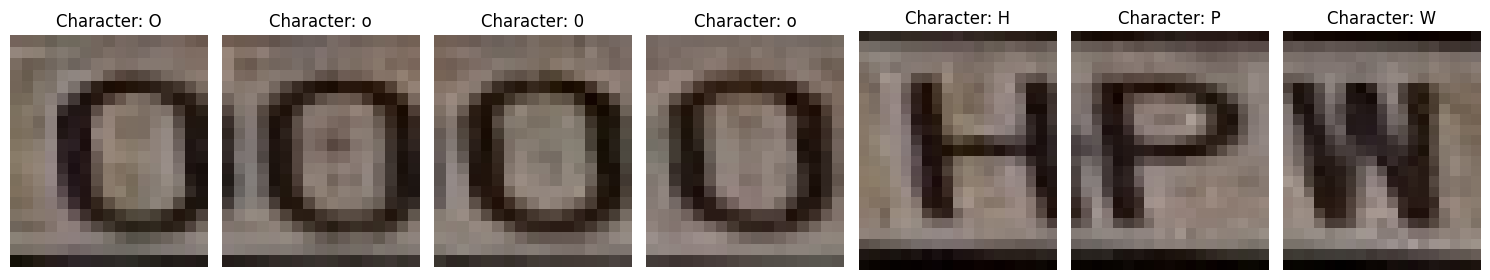

In [41]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import joblib
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Load the image
image_path = '../warped_train/warped_0000HPW_jpg.rf.2f28e14d79e2c7e0468a28e8c77466ea.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    # Convert the image to RGB as EasyOCR expects images in this format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu= False)

    # Detect text regions using the RGB image
    results = reader.readtext(image_rgb, detail=1)

    # Create a list to store individual character images
    character_images = []

    for (bbox, text, _) in results:
        # Get bounding box coordinates for the entire detected text
        (top_left, top_right, bottom_right, bottom_left) = bbox
        min_x = int(min(top_left[0], bottom_left[0]))
        max_x = int(max(top_right[0], bottom_right[0]))
        min_y = int(min(top_left[1], top_right[1]))
        max_y = int(max(bottom_left[1], bottom_right[1]))

        # Crop the entire detected text region
        cropped_text_region = image[min_y:max_y, min_x:max_x]

        # Loop through each character in the detected text
        for i, char in enumerate(text):
            # Calculate character width based on the overall width of the text
            char_width = (max_x - min_x) // len(text)

            # Define the start and end positions for the character
            char_x_start = min_x + char_width * i
            char_x_end = char_x_start + char_width

            # Ensure we don't exceed the cropped region's boundaries
            char_x_start = max(min_x, char_x_start)
            char_x_end = min(max_x, char_x_end)

            # Crop the individual character from the text region
            char_cropped = cropped_text_region[:, char_x_start - min_x:char_x_end - min_x]

            # Check if the character crop is not empty before adding
            if char_cropped.size > 0:
                character_images.append((char_cropped, char))
            else:
                print(f"Empty character crop for: {char} at index {i}")

    # Display the cropped characters using Matplotlib
    num_characters = len(character_images)
    fig, axes = plt.subplots(1, num_characters, figsize=(15, 5))

    # If there's only one character detected, ensure axes is a list
    if num_characters == 1:
        axes = [axes]

    for idx, (char_image, char) in enumerate(character_images):
        # Check if char_image is empty before attempting to convert
        if char_image.size > 0:
            axes[idx].imshow(cv2.cvtColor(char_image, cv2.COLOR_BGR2RGB))
            axes[idx].set_title(f"Character: {char}")
            axes[idx].axis('off')
            character_resized = cv2.resize(char_image, (32,32))
        else:
            print(f"Skipping empty image for character: {char}")

    plt.tight_layout()
    plt.show()

In [43]:
import os
import cv2
import numpy as np
import joblib  # For saving and loading the model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use Agg backend for saving plots without displaying them
plt.switch_backend('Agg')

# Data path
data_path = '../character_data'

# Parameters
image_size = (20, 20)  # Resize images to a fixed size

# Prepare the data
X = []  # Feature vectors
y = []  # Labels

# Load images and labels
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            if image is not None:
                image = cv2.resize(image, image_size).flatten()  # Resize and flatten the image
                X.append(image)
                y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = '../models/svm_character_recognition_model.pkl'
joblib.dump(svm_classifier, model_filename)
print(f"Model saved as {model_filename}")

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get detailed classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Confusion matrix plot saved as 'confusion_matrix.png'")

# Plotting the classification report
labels = list(report.keys())  # Get the labels from the classification report
precision = [report[label]['precision'] for label in labels if label != 'accuracy']
recall = [report[label]['recall'] for label in labels if label != 'accuracy']
f1_score = [report[label]['f1-score'] for label in labels if label != 'accuracy']

x = np.arange(len(labels) - 1)  # Adjust for 'accuracy' being excluded
width = 0.25  # Width of the bars

plt.figure(figsize=(12, 8))
plt.bar(x - width, precision, width, label='Precision', color='b')
plt.bar(x, recall, width, label='Recall', color='g')
plt.bar(x + width, f1_score, width, label='F1-Score', color='r')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, labels[:-1], rotation=45)  # Exclude the 'accuracy' key
plt.legend()
plt.tight_layout()
plt.savefig('classification_report.png')
print("Classification report plot saved as 'classification_report.png'")

# Load the saved model for inference
loaded_model = joblib.load(model_filename)

# Inference example
sample_image_path = '../character_data/0/0_3.png'
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
sample_image_resized = cv2.resize(sample_image, image_size).flatten().reshape(1, -1)
predicted_label = loaded_model.predict(sample_image_resized)
print(f"Predicted label for the sample image: {predicted_label[0]}")


Model saved as ../models/svm_character_recognition_model.pkl
Accuracy: 83.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.78      0.95      0.85        37
           2       0.87      0.93      0.90        28
           3       0.92      0.89      0.91        27
           4       0.90      0.95      0.93        20
           5       0.78      0.75      0.77        24
           6       0.85      0.74      0.79        31
           7       0.90      0.93      0.92        29
           8       0.71      0.77      0.74        31
           9       0.81      0.77      0.79        22
           B       0.71      0.71      0.71        31
           C       0.88      0.95      0.91        37
           D       0.86      0.80      0.83        30
           F       0.79      0.90      0.84        30
           G       0.86      0.77      0.81        31
           H       0.78      0.88